In [1]:
import pandas as pd

# Load the dataset
survey_data = pd.read_csv("E:\data\Survey.csv")

# First few rows of the dataset
survey_data.head()


,City,Sex,Age,Occupation,Monthly Household Income,Income,Planning to Buy a new house,Time Frame,Reasons for buying a house,what type of House,...,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages,sex,Finished/Semi Finished.1,Influence Decision.1
0,Bangalore,M,26-35,Private Sector,"85,001 to105,000",95000,Yes,6M to 1Yr,Residing,Apartment,...,1,9,1200,72.5,30000,42500,30.5,M,Semifurnished,Site visits
1,Bangalore,M,46-60,Government/PSU,"45,001 to 65,000",55000,Yes,6M to 1Yr,Investment,Apartment,...,2,9,800,32.5,120,27500,53.0,M,Semifurnished,Newspaper
2,Bangalore,F,46-60,Government/PSU,"25,001 to 45,000",35000,Yes,<6 Months,Rental Income,Apartment,...,4,3,400,12.5,10000,10000,53.0,F,Semifurnished,Hoarding
3,Bangalore,M,36-45,Private Sector,>125000,200000,Yes,<6 Months,Investment,Apartment,...,5,3,1600,102.5,70000,80000,40.5,M,Furnished,Electronic/Internet
4,Bangalore,M,26-35,Self Employed,"85,001 to105,000",95000,Yes,1-2 Yr,Residing,Apartment,...,3,18,800,52.5,30000,42500,30.5,M,Semifurnished,Electronic/Internet


In [2]:

# missing values
missing_values = survey_data.isnull().sum()
missing_values

City                                         0
Sex                                          0
Age                                          0
Occupation                                   0
Monthly Household Income                     0
Income                                       0
Planning to Buy a new house                  0
Time Frame                                   0
Reasons for buying a house                   0
what type of House                           0
Number of rooms                              0
Size of House                                0
Budget                                       0
Finished/Semi Finished                       0
Influence Decision                           0
Maintainance                                 0
EMI                                          0
1.Proximity to city                          0
2.Proximity to schools                       0
3. Proximity to transport                    0
4. Proximity to work place                   0
5. Proximity 

In [3]:
# Handle missing values
# The mean or median of the column can be used for imputation
# survey_data.fillna(survey_data.mean(), inplace=True)

In [4]:

# Display column types
column_types = survey_data.dtypes
column_types

City                                          object
Sex                                           object
Age                                           object
Occupation                                    object
Monthly Household Income                      object
Income                                         int64
Planning to Buy a new house                   object
Time Frame                                    object
Reasons for buying a house                    object
what type of House                            object
Number of rooms                               object
Size of House                                 object
Budget                                        object
Finished/Semi Finished                        object
Influence Decision                            object
Maintainance                                  object
EMI                                           object
1.Proximity to city                            int64
2.Proximity to schools                        

In [5]:

pip install factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------------------- 42.8/42.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=8f929a3299af4dd4fc2d41b98240b22cb2d345bdc74ea96cffc1dfffff50a46a
  Stored in directory: c:\users\prami\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Principal Component Analysis

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer, Rotator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
survey_df = pd.read_csv("E:\data\Survey.csv")

# Display the dimensions of the dataset
print(survey_df.shape)

(70, 50)


In [10]:
# Display the column names
print(survey_df.columns)

# Display the structure of the dataset
print(survey_df.info())

Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availabilit

In [11]:
# Display the first few rows of the dataset
print(survey_df.head())

        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0          Apartment  ...          

In [12]:
# Check for missing values
print(survey_df.isna().sum().sum())

0


In [13]:
# Select relevant columns for analysis
sur_int = survey_df.iloc[:, 17:46]

In [14]:
# Display the structure and dimensions of the selected data
print(sur_int.info())
print(sur_int.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   1.Proximity to city                        70 non-null     int64  
 1   2.Proximity to schools                     70 non-null     int64  
 2   3. Proximity to transport                  70 non-null     int64  
 3   4. Proximity to work place                 70 non-null     int64  
 4   5. Proximity to shopping                   70 non-null     int64  
 5   1. Gym/Pool/Sports facility                70 non-null     int64  
 6   2. Parking space                           70 non-null     int64  
 7   3.Power back-up                            70 non-null     int64  
 8   4.Water supply                             70 non-null     int64  
 9   5.Security                                 70 non-null     int64  
 10  1. Exterior look            

[9.27394294e-01 7.25413291e-02 6.42132800e-05 1.32931578e-07
 1.98172713e-08]


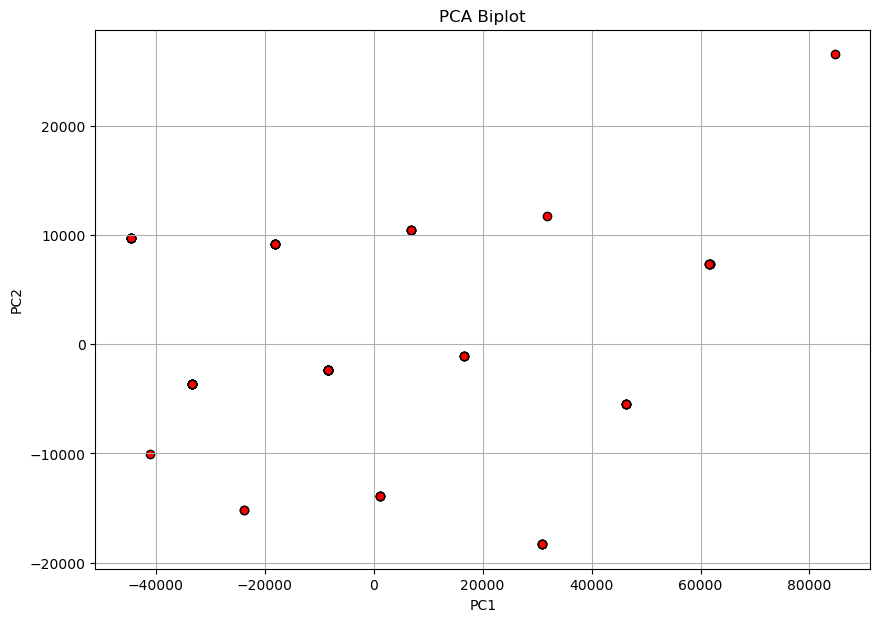

In [15]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int)

# Display the explained variance by each principal component
print(pca.explained_variance_ratio_)

# Biplot for PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', c='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

In [16]:
# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(sur_int)

# Get loadings and variance
loadings = fa.loadings_
variance = fa.get_factor_variance()

In [17]:
# Print loadings
print("Factor Loadings:\n", loadings)

Factor Loadings:
 [[ 0.50884619  0.27312146  0.53334389 -0.12304733 -0.06666914]
 [ 0.43008815 -0.2135028   0.287508    0.0803308   0.19429725]
 [-0.05890181 -0.23063214 -0.2237324   0.45576005  0.03791108]
 [ 0.19226715 -0.02826911  0.67676207  0.06125958  0.35357994]
 [ 0.60251296  0.38292984 -0.141275   -0.04284233  0.35114472]
 [ 0.50764829 -0.14067052 -0.02454524  0.01052981  0.30000375]
 [ 0.56946532 -0.05864104 -0.01149061 -0.1468844   0.1984032 ]
 [ 0.4398776   0.10407693  0.18110239 -0.05551929  0.40156296]
 [ 0.58022168 -0.34798674 -0.13332432  0.50705236  0.18752373]
 [ 0.54372309 -0.1099251  -0.44249386  0.03011775  0.36565411]
 [ 0.63381886  0.52949595 -0.1887203  -0.23889376 -0.13139693]
 [ 0.15570217 -0.12535338 -0.01695808 -0.03576242 -0.22453895]
 [ 0.74191079  0.04540447  0.01476866 -0.12495659  0.07492432]
 [ 0.65797353  0.00434267  0.20788423 -0.12154204 -0.03127687]
 [ 0.76593221  0.09994831 -0.24501578 -0.1667065   0.03900293]
 [ 0.36034875 -0.29368266  0.0701996 

In [18]:
# Print variance
print("Variance:\n", variance)

Variance:
 (array([8.67577044, 2.2262735 , 1.68348493, 1.37350916, 1.18867099]), array([0.2991645 , 0.07676805, 0.0580512 , 0.04736238, 0.04098865]), array([0.2991645 , 0.37593255, 0.43398375, 0.48134614, 0.52233479]))


In [19]:
# Perform Factor Analysis with Promax rotation
rotator = Rotator()
loadings_promax = rotator.fit_transform(loadings)

# Print rotated loadings
print("Promax Rotated Loadings:\n", loadings_promax)

Promax Rotated Loadings:
 [[ 0.46714451  0.11926277  0.52988179 -0.3370168   0.103722  ]
 [ 0.24549466 -0.18114714  0.44631867  0.17229263  0.18830175]
 [-0.04201605  0.05402242 -0.1332634   0.53920389 -0.05184137]
 [ 0.02605045 -0.0677292   0.78515469 -0.015102   -0.050817  ]
 [ 0.13145831  0.29244796  0.23157625 -0.07686782  0.70171968]
 [ 0.16030233 -0.13384565  0.26136046  0.18084911  0.47284606]
 [ 0.25214938 -0.14220118  0.22154949 -0.00527558  0.50585365]
 [ 0.0575607   0.02128851  0.46356422 -0.02847006  0.42660148]
 [ 0.33594852 -0.04501885  0.18588997  0.69461831  0.36858758]
 [ 0.06659912 -0.06557223 -0.03187198  0.29693952  0.73498645]
 [ 0.4400064   0.34058406 -0.0599412  -0.38814566  0.57287861]
 [ 0.26251992 -0.11759567 -0.09525598  0.00540003 -0.00962271]
 [ 0.45721138 -0.04234991  0.23264687 -0.05641008  0.55298885]
 [ 0.50758789 -0.08622348  0.31247571 -0.10649824  0.34329535]
 [ 0.44371309  0.0059104   0.00705018 -0.0602115   0.69670328]
 [ 0.3741643  -0.07713116  0.

In [20]:
#Performing Factor Analysis

In [22]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import networkx as nx

# Read the CSV file
survey_df = pd.read_csv("E:\data\Survey.csv")

# Select the subset of the DataFrame
sur_int = survey_df.iloc[:, 17:46]

In [23]:
# Perform factor analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(sur_int)

# Get the factor loadings
loadings = fa.loadings_

# Print the factor loadings
print("Factor Loadings:\n", loadings)

Factor Loadings:
 [[ 0.33753775  0.71892827 -0.16956858  0.08289052]
 [ 0.22171927  0.40551525  0.2583849  -0.18624162]
 [-0.1209114  -0.22490678  0.50139654  0.07718494]
 [-0.06137541  0.61511256  0.04235349 -0.05585575]
 [ 0.65168375  0.11300809 -0.03225945  0.25135221]
 [ 0.42647467  0.14861608  0.22328144 -0.13896272]
 [ 0.52868573  0.18436608  0.07525323 -0.16087285]
 [ 0.35630544  0.30273728  0.01913563  0.01216143]
 [ 0.38240465  0.08615312  0.75168734 -0.04848915]
 [ 0.59416883 -0.19521654  0.27513336 -0.07109694]
 [ 0.78304283  0.08902564 -0.2684961   0.28547653]
 [ 0.12855266  0.03508623  0.07175967 -0.13226527]
 [ 0.69129624  0.28201289  0.07913587 -0.07946821]
 [ 0.5394966   0.42928054  0.05616844 -0.12486113]
 [ 0.82785614  0.04677273  0.05455878 -0.03622455]
 [ 0.15425663  0.20124954  0.53223407 -0.08359565]
 [ 0.10783557 -0.04202842 -0.14035791  0.51892494]
 [-0.1011358  -0.05599313  0.21793622  0.51983823]
 [-0.06806622 -0.09088173 -0.10750336  0.31846584]
 [-0.15004269

In [24]:
# Create a dataframe for the loadings and reorder the columns based on highest loadings
loadings_df = pd.DataFrame(loadings, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])], index=sur_int.columns)
sorted_loadings_df = loadings_df.loc[:, (loadings_df.abs().max().sort_values(ascending=False).index)]

print("Sorted Factor Loadings with Factor Names:\n", sorted_loadings_df)

Sorted Factor Loadings with Factor Names:
                                             Factor4   Factor1   Factor3  \
1.Proximity to city                        0.082891  0.337538 -0.169569   
2.Proximity to schools                    -0.186242  0.221719  0.258385   
3. Proximity to transport                  0.077185 -0.120911  0.501397   
4. Proximity to work place                -0.055856 -0.061375  0.042353   
5. Proximity to shopping                   0.251352  0.651684 -0.032259   
1. Gym/Pool/Sports facility               -0.138963  0.426475  0.223281   
2. Parking space                          -0.160873  0.528686  0.075253   
3.Power back-up                            0.012161  0.356305  0.019136   
4.Water supply                            -0.048489  0.382405  0.751687   
5.Security                                -0.071097  0.594169  0.275133   
1. Exterior look                           0.285477  0.783043 -0.268496   
2. Unit size                              -0.132265  0.12

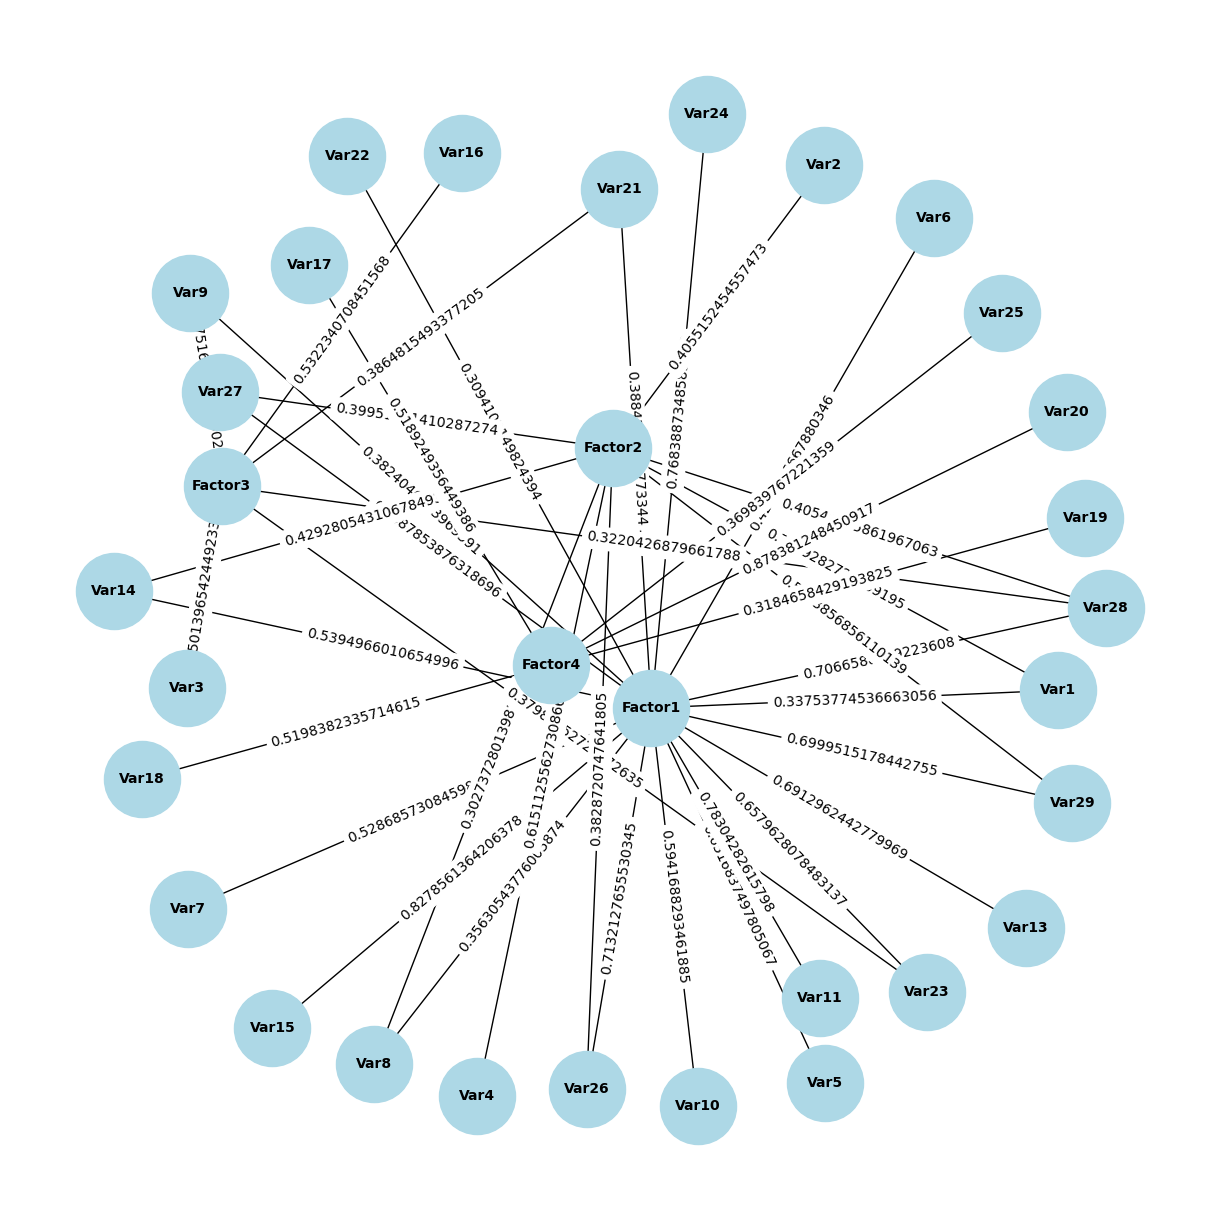

In [25]:
# Plot factor diagram
def plot_factor_diagram(loadings):
    G = nx.Graph()
    for i, factor in enumerate(loadings.T):
        for j, loading in enumerate(factor):
            if abs(loading) > 0.3:  # Adjust threshold as needed
                G.add_edge(f'Factor{i+1}', f'Var{j+1}', weight=abs(loading))
    
    pos = nx.spring_layout(G, k=1.5, iterations=50)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

plot_factor_diagram(loadings)

In [26]:
# Get communalities
communalities = fa.get_communalities()
print("Communalities:\n", communalities)

Communalities:
 [0.66641393 0.31505075 0.32255863 0.38704408 0.50168114 0.27313262
 0.34504258 0.2191175  0.72104074 0.47189923 0.77466864 0.04040038
 0.56999945 0.49408356 0.69182235 0.35455783 0.30237833 0.33109167
 0.12586996 0.85703086 0.39708828 0.17201963 0.62294334 0.63983536
 0.15522762 0.72147226 0.75210639 0.76752387 0.80701311]


In [27]:

# Get factor scores
factor_scores = fa.transform(sur_int)
print("Factor Scores:\n", factor_scores)

Factor Scores:
 [[-5.91900342e-01 -1.13337861e-01  2.06490269e+00 -8.14927348e-01]
 [-1.48995575e+00 -3.67683857e-01  7.81255156e-01 -1.17145391e+00]
 [-5.51814891e-01 -3.37726282e+00  9.52387527e-01 -1.33883717e+00]
 [ 1.89430492e+00  1.34999382e-01  2.68149757e-01 -2.07648042e+00]
 [ 3.31954481e-01 -1.81537981e-01 -1.17934144e+00 -3.62713443e-01]
 [-2.88674007e-01 -4.77204920e-01  3.70031161e-01 -2.11617726e-01]
 [ 5.03973368e-01  6.57473266e-01  1.06609245e+00  4.41395780e-01]
 [-1.92261663e+00 -7.21558767e-01  1.26683670e-01 -1.30038421e+00]
 [-7.12031847e-01  1.09349102e-01 -4.07142741e-02  3.79688587e-01]
 [ 1.58504474e-01  9.86046551e-01 -4.61501871e-01  3.23844041e-01]
 [-3.58593374e-01 -8.78460574e-01 -5.52871379e-01  2.01781972e-01]
 [-1.08283140e+00  1.07633273e+00 -1.33400794e+00 -8.77784848e-01]
 [-1.27240394e+00  8.88132788e-02  5.00872206e-01  8.79515068e-01]
 [-1.48929188e-01  8.03858678e-01  7.25618800e-02  8.51609502e-01]
 [-9.00750825e-01 -5.80302634e-01  1.47853996e

In [28]:
#A.4.2. Cluster Analysis

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Load data
survey_df = pd.read_csv("E:\data\Survey.csv")
sur_int = survey_df.iloc[:, 19:46]

# Normalize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

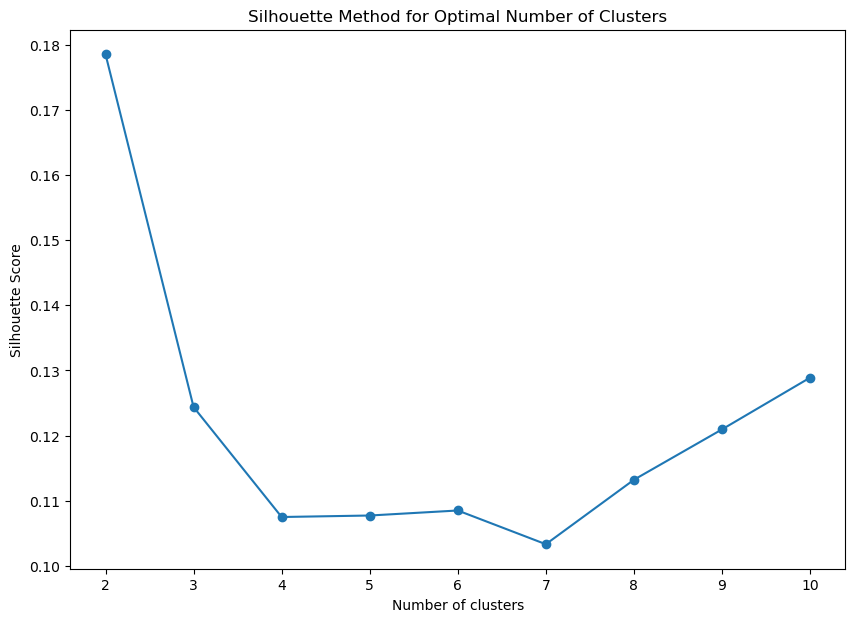

In [30]:
# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
    kmeans.fit(sur_int_scaled)
    silhouette_scores.append(silhouette_score(sur_int_scaled, kmeans.labels_))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

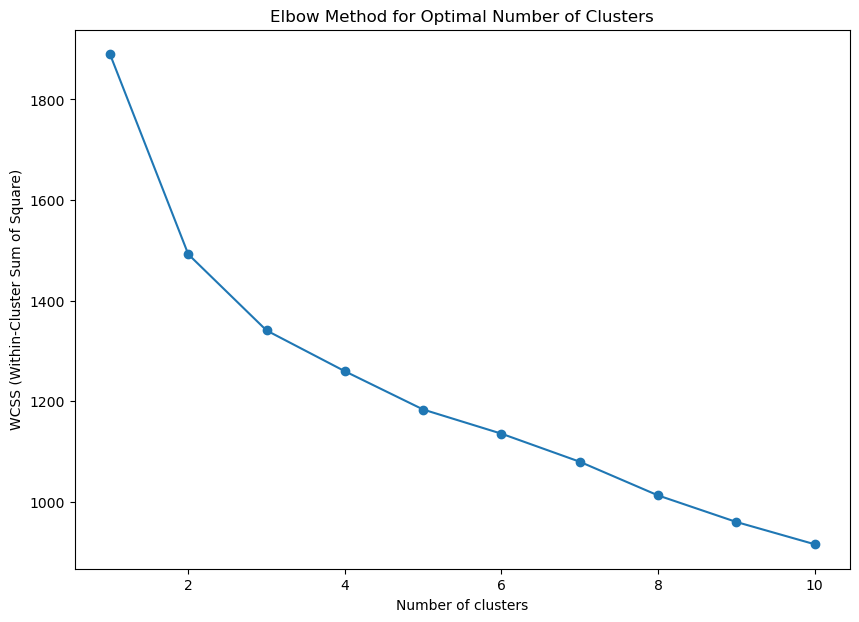

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
    kmeans.fit(sur_int_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

D:\Newfolder3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


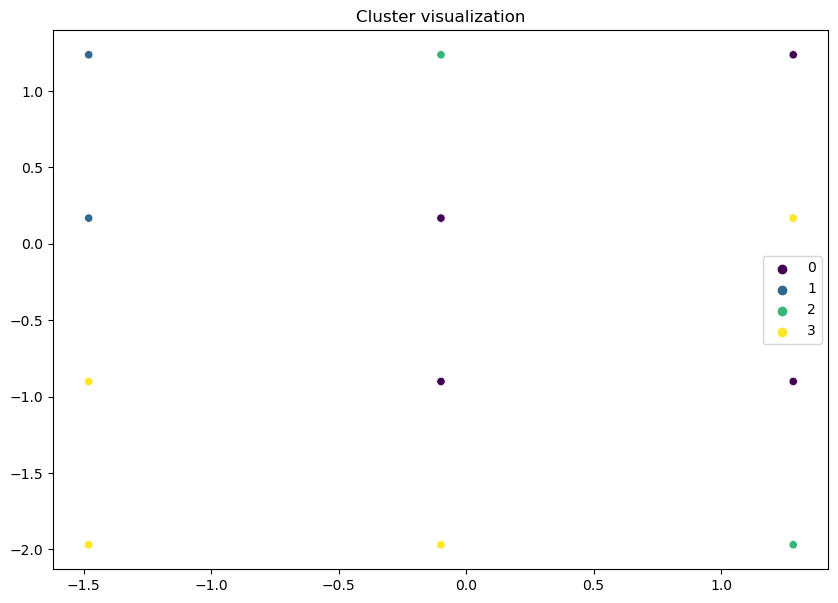

In [32]:
# Choose the number of clusters (for example, based on the Elbow Method and Silhouette Method results)
n_clusters = 4  # Adjust this based on the plots

# Set random seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering
km = KMeans(n_clusters=n_clusters, n_init=25, random_state=123)
km.fit(sur_int_scaled)
clusters = km.labels_

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=sur_int_scaled[:, 0], y=sur_int_scaled[:, 1], hue=clusters, palette="viridis")
plt.title('Cluster visualization')
plt.show()

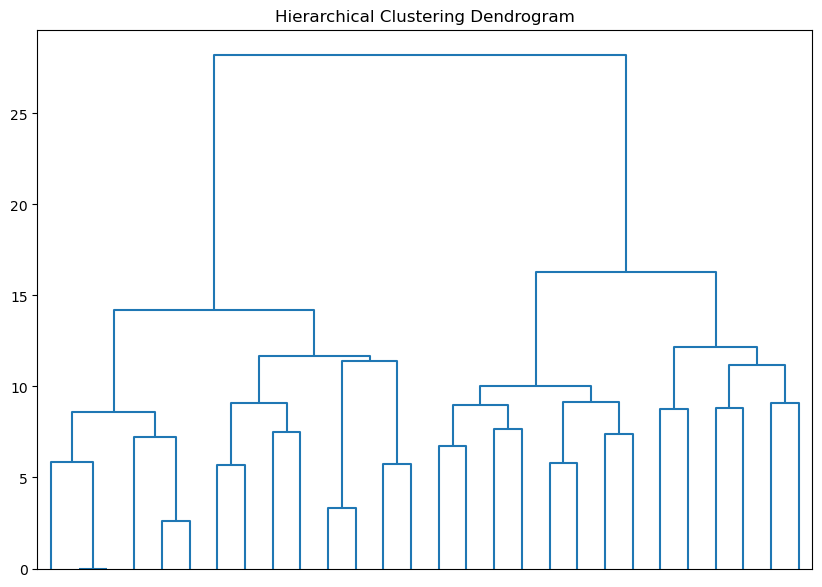

In [33]:
# Perform hierarchical clustering
linked = linkage(sur_int_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=4, show_leaf_counts=False, no_labels=True, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

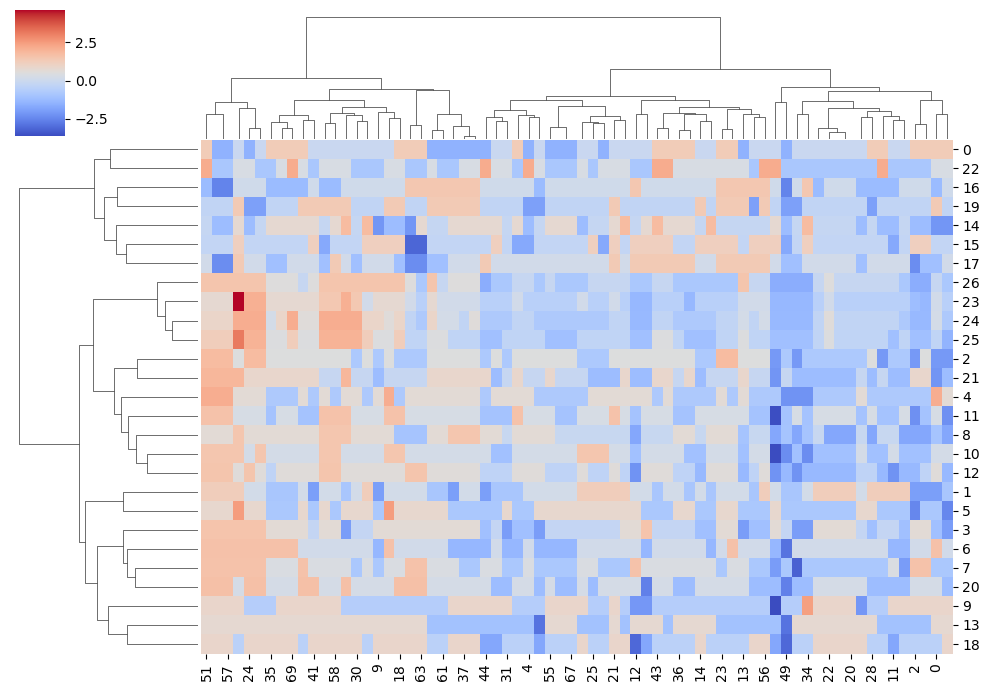

In [34]:
# Visualize clusters using heatmap
sns.clustermap(sur_int_scaled.T, method='ward', cmap='coolwarm', col_cluster=True, figsize=(10, 7))
plt.show()

In [35]:
#A4.3. Multidimensional Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\prami\\Desktop\\SCMA 632\\SCMA 632\\assignments\\A4\\icecream.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Brand,Price,Availability,Taste,Flavour,Consistency,Shelflife
0,Amul,4,5,4,3,4,3
1,Nandini,3,2,3,2,3,3
2,Vadilal,2,2,4,3,4,4
3,Vijaya,3,1,3,5,3,4
4,Dodla,3,3,3,4,4,3


In [39]:
# Extract numerical features and scale them
features = data.drop(columns=['Brand'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [40]:

# Apply Multidimensional Scaling
mds = MDS(n_components=2, random_state=42)
mds_transformed = mds.fit_transform(scaled_features)

D:\Newfolder3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [41]:
# Create a DataFrame with the MDS results and corresponding Brand names
mds_df = pd.DataFrame(mds_transformed, columns=['MDS1', 'MDS2'])
mds_df['Brand'] = data['Brand']

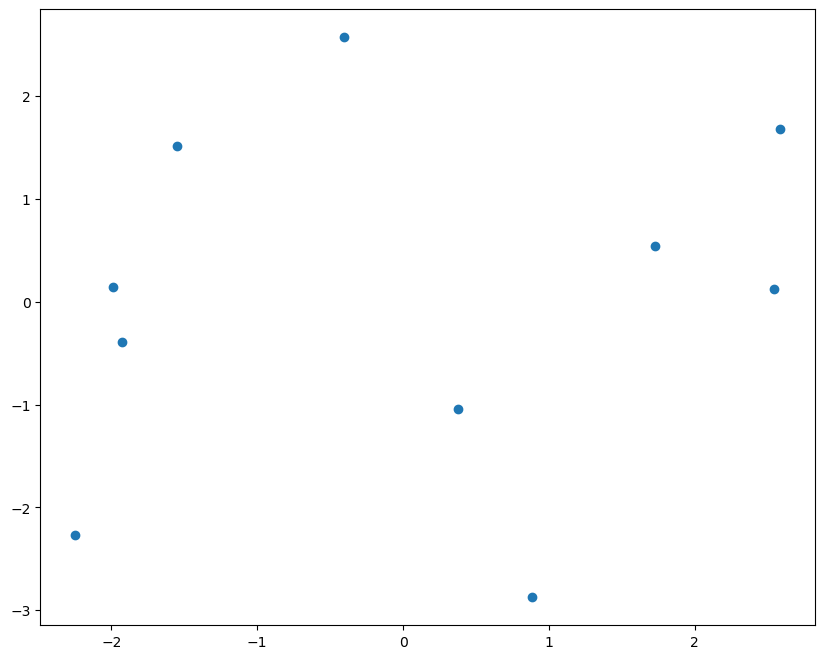

In [42]:

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'])

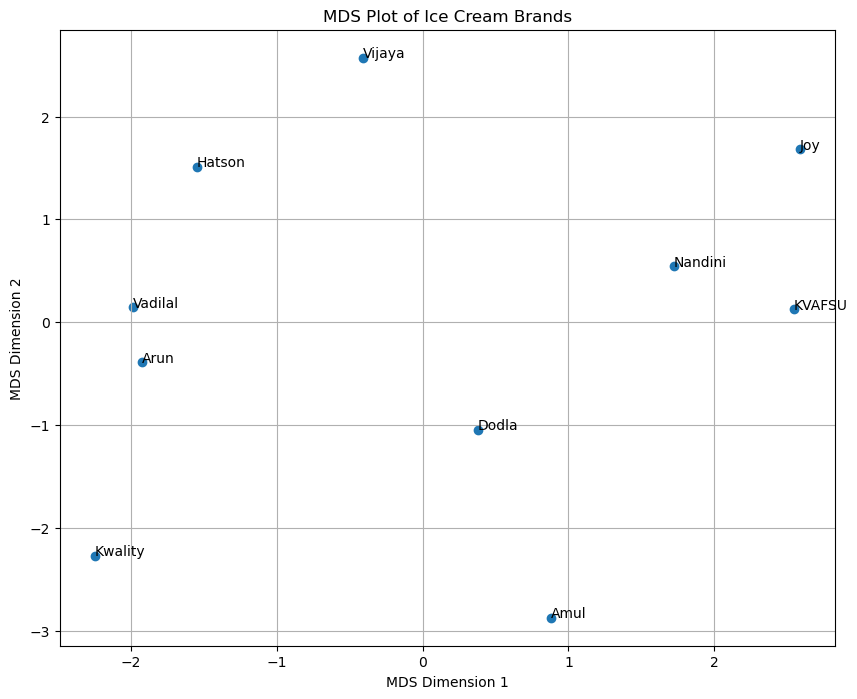

In [43]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'])

# Annotate the points with the brand names
for i, brand in enumerate(mds_df['Brand']):
    plt.annotate(brand, (mds_df['MDS1'][i], mds_df['MDS2'][i]))

plt.title('MDS Plot of Ice Cream Brands')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [44]:
#A4.4 Conjoint Analysis


In [45]:
import pandas as pd
df = pd.read_csv("C:\\Users\\prami\\Desktop\\SCMA 632\\SCMA 632\\assignments\\A4\\pizza_data.csv")

In [46]:

df.head()

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8


In [47]:

df.shape

(16, 9)

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 09 Jul 2024   Prob (F-statistic):             0.0794
Time:                        01:29:37   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

D:\Newfolder3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
conjoint_attributes = ['brand','price','weight','crust','cheese','size','toppings','spicy']

In [50]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

brand
price
weight
crust
cheese
size
toppings
spicy
-------------------------------------------------------------
level name:
[['Dominos', 'Onesta', 'Oven Story', 'Pizza hut'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['thick', 'thin'], ['Cheddar', 'Mozzarella'], ['large', 'regular'], ['mushroom', 'paneer'], ['extra', 'normal']]
npw with sum element:
[0.7499999999999996, -0.7499999999999996]
imp level:
{'brand': 3, 'price': 0, 'weight': 0, 'crust': 0, 'cheese': 1, 'size': 1, 'toppings': 0, 'spicy': 0}
part worth:
[[6.661338147750939e-16, 1.7763568394002505e-15, -0.2500000000000031, 0.25000000000000067], [0.7499999999999996, -5.995204332975845e-15, 6.661338147750939e-15, -0.7500000000000002], [5.000000000000004, 1.999999999999988, -1.2499999999999916, -5.750000000000002], [1.7500000000000004, -1.7500000000000004], [-0.25000000000000044, 0.25000000000000044], [-0.2500000000000006, 0.2500000000000006], [1.1249999999999996, -1.1249999999999996], [0.7499999999

In [51]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71, 7.14]


In [52]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : brand
    Relative importance of attribute  2.38
    Level wise part worths: 
0
0
          Dominos:6.661338147750939e-16
0
1
          Onesta:1.7763568394002505e-15
0
2
          Oven Story:-0.2500000000000031
0
3
          Pizza hut:0.25000000000000067
Attribute : price
    Relative importance of attribute  7.14
    Level wise part worths: 
1
0
          $1.00:0.7499999999999996
1
1
          $2.00:-5.995204332975845e-15
1
2
          $3.00:6.661338147750939e-15
1
3
          $4.00:-0.7500000000000002
Attribute : weight
    Relative importance of attribute  51.19
    Level wise part worths: 
2
0
          100g:5.000000000000004
2
1
          200g:1.999999999999988
2
2
          300g:-1.2499999999999916
2
3
          400g:-5.750000000000002
Attribute : crust
    Relative importance of attribute  16.67
    Level wise part worths: 
3
0
          thick:1.7500000000000004
3
1
          thin:-1.7500000000000004
Attribute : cheese
    Relative importance of attribute  2.38
    L

{'Dominos': 6.661338147750939e-16,
 'Onesta': 1.7763568394002505e-15,
 'Oven Story': -0.2500000000000031,
 'Pizza hut': 0.25000000000000067,
 '$1.00': 0.7499999999999996,
 '$2.00': -5.995204332975845e-15,
 '$3.00': 6.661338147750939e-15,
 '$4.00': -0.7500000000000002,
 '100g': 5.000000000000004,
 '200g': 1.999999999999988,
 '300g': -1.2499999999999916,
 '400g': -5.750000000000002,
 'thick': 1.7500000000000004,
 'thin': -1.7500000000000004,
 'Cheddar': -0.25000000000000044,
 'Mozzarella': 0.25000000000000044,
 'large': -0.2500000000000006,
 'regular': 0.2500000000000006,
 'mushroom': 1.1249999999999996,
 'paneer': -1.1249999999999996,
 'extra': 0.7499999999999996,
 'normal': -0.7499999999999996}

D:\Newfolder3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Importance')

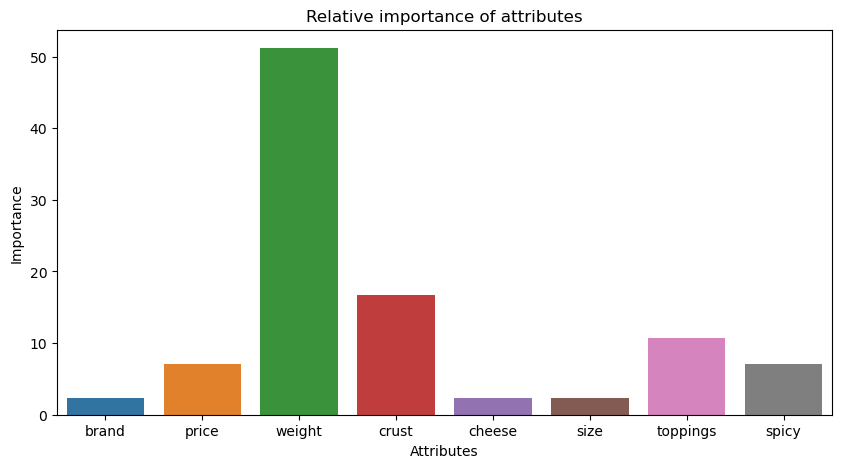

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes, y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [54]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['brand'][i]] + part_worth_dict[
        df['price'][i]] + part_worth_dict[df['weight'][i]] + part_worth_dict[
            df['crust'][i]] + part_worth_dict[df['cheese'][
                i]] + part_worth_dict[df['size'][i]] + part_worth_dict[
                    df['toppings'][i]] + part_worth_dict[df['spicy'][i]]
    utility.append(score)

df['utility'] = utility
utility

[2.6250000000000053,
 3.37500000000001,
 0.37499999999999023,
 -6.375,
 -0.37499999999999734,
 4.3749999999999885,
 -1.374999999999982,
 -4.624999999999993,
 -3.625000000000007,
 7.625,
 -5.375000000000002,
 -2.3750000000000218,
 1.3750000000000058,
 6.375000000000002,
 -7.6249999999999964,
 5.624999999999995]

In [55]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 brand       Oven Story
price            $4.00
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking             16
utility          7.625
Name: 9, dtype: object
